# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta


### Notebook Presentation

In [51]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [52]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?


In [53]:
shape = df_data.shape
print(f"1. Shape of df_data: {shape}")

num_rows, num_columns = shape
print(f"2. Number of rows: {num_rows}, Number of columns: {num_columns}")

column_names = df_data.columns
print(f"3. Column names: {column_names}")



1. Shape of df_data: (4324, 9)
2. Number of rows: 4324, Number of columns: 9
3. Column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [54]:
has_nan_values = df_data.isna().any().any()
has_duplicates = df_data.duplicated().any()


print(f"4. Are there any NaN values? {has_nan_values}")
print(f"   Are there any duplicates? {has_duplicates}")

4. Are there any NaN values? True
   Are there any duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [55]:
df_data_cleaned = df_data.dropna(subset=['Price'])


In [56]:
print(f"Columns dropped due to NaN values: {list(set(df_data.columns) - set(df_data_cleaned.columns))}")
print(f"Shape after cleaning: {df_data_cleaned.shape}")

Columns dropped due to NaN values: []
Shape after cleaning: (964, 9)


## Descriptive Statistics

In [57]:
descriptive_stats = df_data_cleaned.describe()
print(descriptive_stats)

       Unnamed: 0.1  Unnamed: 0
count        964.00      964.00
mean         858.49      858.49
std          784.21      784.21
min            0.00        0.00
25%          324.75      324.75
50%          660.50      660.50
75%        1,112.00    1,112.00
max        4,020.00    4,020.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

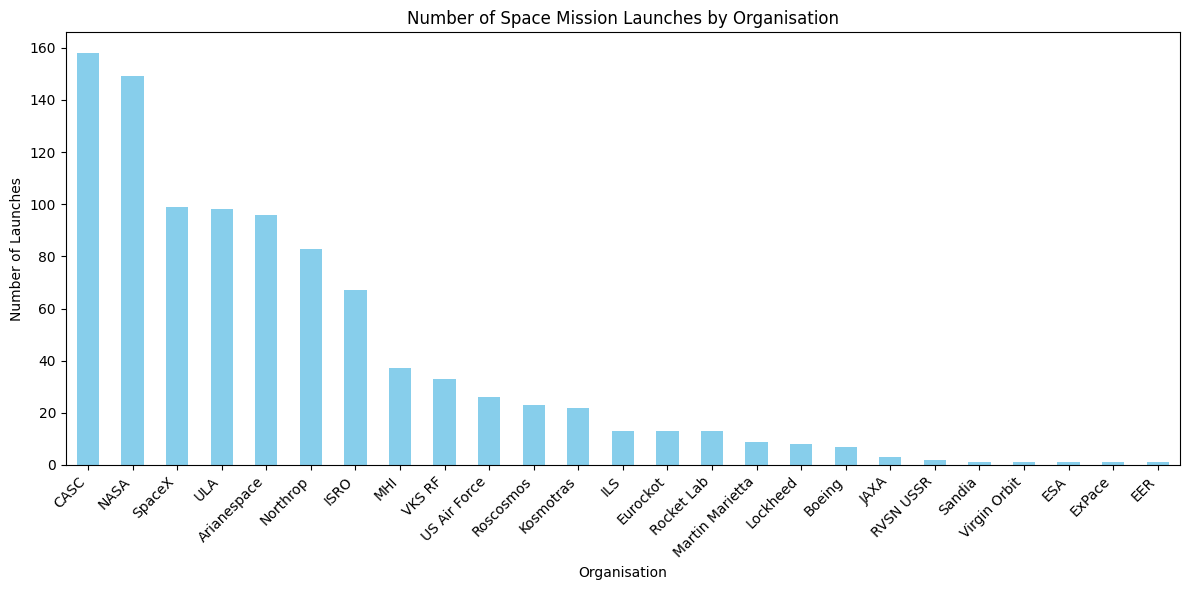

In [58]:
launch_counts = df_data_cleaned['Organisation'].value_counts()

plt.figure(figsize=(12, 6))
launch_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Space Mission Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

Number of Active and Retired Rockets:
Rocket_Status
StatusActive     586
StatusRetired    378
Name: count, dtype: int64


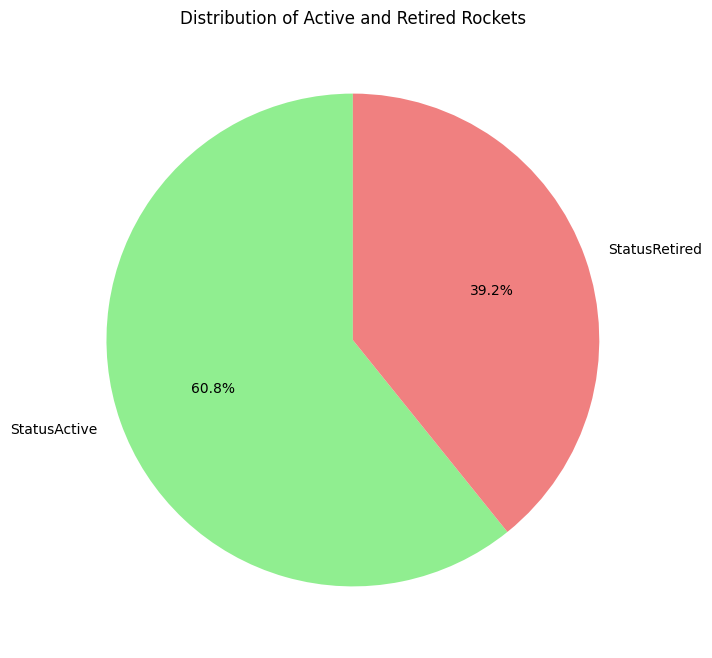

In [59]:
rocket_status_counts = df_data_cleaned['Rocket_Status'].value_counts()

print("Number of Active and Retired Rockets:")
print(rocket_status_counts)

plt.figure(figsize=(8, 8))
plt.pie(rocket_status_counts, labels=rocket_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Active and Retired Rockets')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

Number of Missions by Status:
Mission_Status
Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64


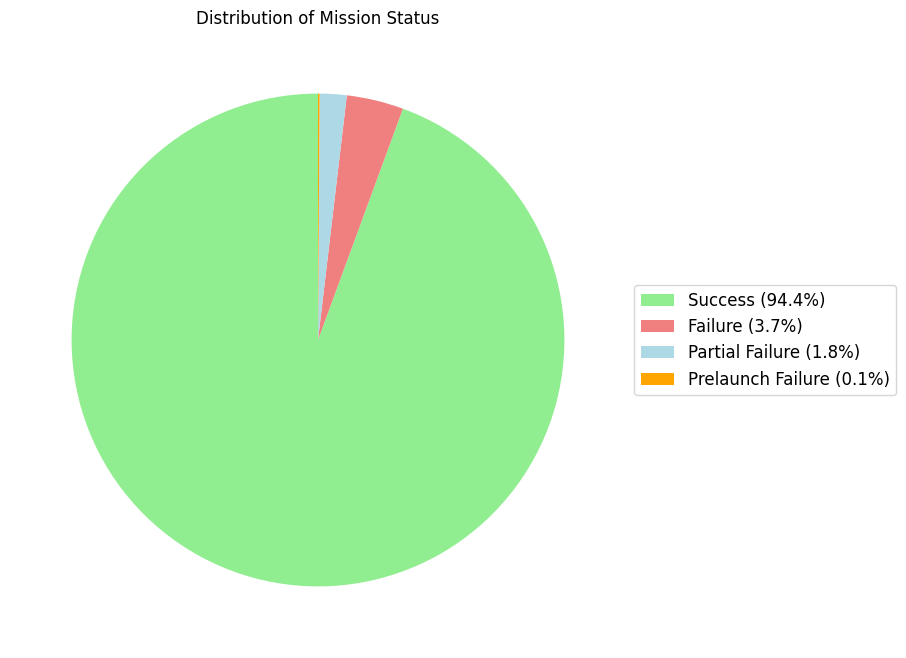

In [60]:
mission_status_counts = df_data_cleaned['Mission_Status'].value_counts()

colors = ['lightgreen', 'lightcoral', 'lightblue', 'orange']

print("Number of Missions by Status:")
print(mission_status_counts)

plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(mission_status_counts, labels=None, startangle=90, colors=colors, autopct='')

legend_labels = [f"{label} ({percent:.1f}%)"
                 for label, percent in zip(mission_status_counts.index, mission_status_counts / mission_status_counts.sum() * 100)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribution of Mission Status')
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

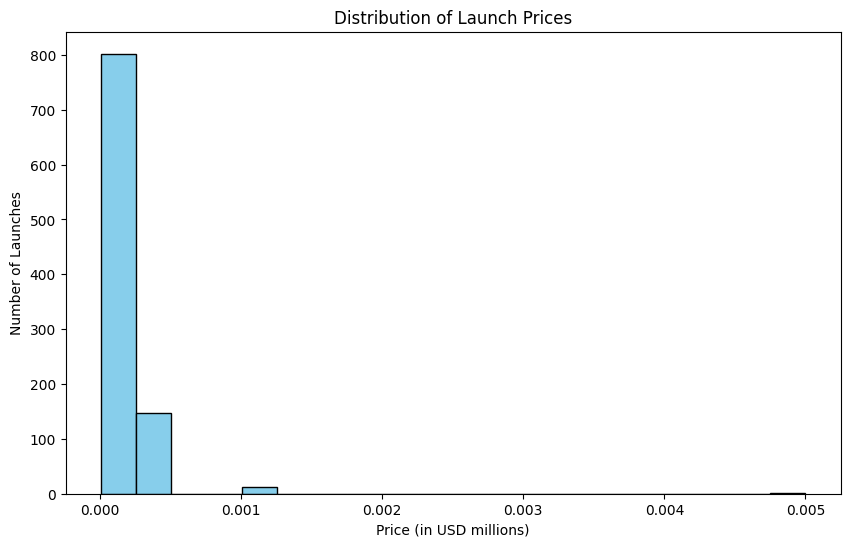

In [61]:
df_data_cleaned = df_data_cleaned.dropna(subset=['Price']).copy()

df_data_cleaned['Price'] = df_data_cleaned['Price'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
plt.hist(df_data_cleaned['Price'] / 1e6, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Launch Prices')
plt.xlabel('Price (in USD millions)')
plt.ylabel('Number of Launches')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [62]:
df_data = df_data.drop('Unnamed: 0', axis=1)
 
df_data.drop_duplicates(['Date', 'Location'], keep='first', inplace=True)
 
df_data['country'] = df_data['Location'].str.split(',').str[-1].str.strip()
country = df_data.country.value_counts()
 
world_map = px.choropleth(country, locations=country.index, locationmode='country names', color=country.values, color_continuous_scale=px.colors.sequential.matter)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [63]:
failures = df_data[df_data['Mission_Status'] != 'Success'].copy()  

failures.drop_duplicates(['Date', 'Location'], keep='first', inplace=True)

failures['country'] = failures['Location'].str.split(',').str[-1].str.strip()

failures_by_country = failures['country'].value_counts()

failure_map = px.choropleth(
    failures_by_country,
    locations=failures_by_country.index,
    locationmode='country names',
    color=failures_by_country.values,
    color_continuous_scale=px.colors.sequential.matter,
    title='Number of Failures by Country',
)

failure_map.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [64]:
df_data['country'] = df_data['Location'].str.split(',').str[-1].str.strip()

sunburst_chart = px.sunburst(
    df_data,
    path=['country', 'Organisation', 'Mission_Status'],
    title='Sunburst Chart of Countries, Organisations, and Mission Status',
    color='Mission_Status',
)

sunburst_chart.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [65]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')


total_spending_by_org = df_data.groupby('Organisation')['Price'].sum().reset_index()


bar_chart = px.bar(
    total_spending_by_org,
    x='Organisation',
    y='Price',
    title='Total Amount of Money Spent by Organisation on Space Missions',
    labels={'Price': 'Total Amount Spent'},
)


bar_chart.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [66]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

average_spending_per_launch = df_data.groupby('Organisation')['Price'].mean().reset_index()

bar_chart = px.bar(
    average_spending_per_launch,
    x='Organisation',
    y='Price',
    title='Average Amount of Money Spent per Launch by Organisation',
    labels={'Price': 'Average Amount Spent per Launch'},
)

bar_chart.show()


# Chart the Number of Launches per Year

In [67]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

df_data['Year'] = df_data['Date'].dt.year

launches_per_year = df_data.groupby('Year').size().reset_index(name='Number of Launches')

bar_chart = px.bar(
    launches_per_year,
    x='Year',
    y='Number of Launches',
    title='Number of Launches per Year',
    labels={'Number of Launches': 'Number of Launches'},
)


bar_chart.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [68]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Date'] = df_data['Date'].dt.tz_localize(None)
df_data['MonthYear'] = df_data['Date'].dt.to_period('M').astype(str)

launches_per_month = df_data.groupby('MonthYear').size().reset_index(name='Number of Launches')

launches_per_month['Rolling Average'] = launches_per_month['Number of Launches'].rolling(window=12, min_periods=1).mean()

line_chart = px.line(
    launches_per_month,
    x='MonthYear',
    y=['Number of Launches', 'Rolling Average'],
    title='Number of Launches Month-on-Month with Rolling Average',
    labels={'value': 'Number of Launches'},
)

line_chart.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [69]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Date'] = df_data['Date'].dt.tz_localize(None)

df_data['Month'] = df_data['Date'].dt.month

launches_per_month = df_data.groupby('Month').size().reset_index(name='Number of Launches')

launches_per_month = launches_per_month.sort_values('Month')

bar_chart = px.bar(
    launches_per_month,
    x='Month',
    y='Number of Launches',
    title='Number of Launches per Month',
    labels={'Number of Launches': 'Number of Launches', 'Month': 'Month'},
)

bar_chart.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [70]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

df_data['Date'] = df_data['Date'].dt.tz_localize(None)

df_data['Year'] = df_data['Date'].dt.year

average_price_by_year = df_data.groupby('Year')['Price'].mean().reset_index()


line_chart = px.line(
    average_price_by_year,
    x='Year',
    y='Price',
    title='Average Price of Rocket Launches Over Time',
    labels={'Price': 'Average Price'},
)


line_chart.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [71]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Date'] = df_data['Date'].dt.tz_localize(None)
df_data['Year'] = df_data['Date'].dt.year

top_10_organizations = df_data['Organisation'].value_counts().nlargest(10).index
df_top_10 = df_data[df_data['Organisation'].isin(top_10_organizations)]

launches_over_time_top_10 = df_top_10.groupby(['Year', 'Organisation']).size().reset_index(name='Number of Launches')

line_chart_top_10 = px.line(
    launches_over_time_top_10,
    x='Year',
    y='Number of Launches',
    color='Organisation',
    title='Number of Launches Over Time by the Top 10 Organizations',
    labels={'Number of Launches': 'Number of Launches', 'Year': 'Year'},
)

line_chart_top_10.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [72]:

df_cold_war = df_data[df_data['Year'] <= 1991]

launches_over_time_cold_war = df_cold_war.groupby(['Year', 'country']).size().reset_index(name='Number of Launches')

line_chart_cold_war = px.line(
    launches_over_time_cold_war,
    x='Year',
    y='Number of Launches',
    color='country',
    title='Cold War Space Race: USA vs USSR',
    labels={'Number of Launches': 'Number of Launches', 'Year': 'Year'},
)

line_chart_cold_war.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [73]:
df_data['country'] = df_data['Location'].str.split(',').str[-1].str.strip()
former_soviet_republics = ['Russia', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan', 'Georgia', 'Armenia', 'Azerbaijan']
df_data.loc[df_data['country'].isin(former_soviet_republics), 'country'] = 'USSR'
launches_by_country = df_data['country'].value_counts().reset_index()
launches_by_country.columns = ['Country', 'Number of Launches']

total_launches = launches_by_country['Number of Launches'].sum()
launches_by_country['Percentage'] = (launches_by_country['Number of Launches'] / total_launches) * 100


pie_chart = px.pie(
    launches_by_country,
    values='Number of Launches',
    names='Country',
    title='Total Number of Launches of the USSR and the USA (including former Soviet Republics)',
)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')


pie_chart.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [78]:
df_data['Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year

df_data = df_data.dropna(subset=['Year'])

df_data['Year'] = df_data['Year'].astype(int)

former_soviet_republics = ['Russia', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan', 'Georgia', 'Armenia', 'Azerbaijan']
df_data.loc[df_data['country'].isin(former_soviet_republics), 'country'] = 'USSR'

usa_data = df_data[df_data['country'] == 'USA']
ussr_russia_data = df_data[df_data['country'] == 'USSR']

usa_launches_yearly = usa_data['Year'].value_counts().sort_index().reset_index()
usa_launches_yearly.columns = ['Year', 'Number of Launches']

ussr_russia_launches_yearly = ussr_russia_data['Year'].value_counts().sort_index().reset_index()
ussr_russia_launches_yearly.columns = ['Year', 'Number of Launches']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=usa_launches_yearly['Year'],
    y=usa_launches_yearly['Number of Launches'],
    name='Number of Launches (USA)',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=ussr_russia_launches_yearly['Year'],
    y=ussr_russia_launches_yearly['Number of Launches'],
    name='Number of Launches (USSR/Russia)',
    marker_color='red'
))

fig.update_layout(
    title='Total Number of Launches Year-On-Year by the USA and USSR/Russia',
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    legend=dict(
        traceorder='normal',
        font=dict(size=12),
        bordercolor='gray',
        borderwidth=1,
        itemsizing='constant' 
    )
)

fig.show()




## Chart the Total Number of Mission Failures Year on Year.

In [80]:
df_data = df_data[df_data['Mission_Status'] != 'Success']

df_data['Year'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.year.astype('Int64')

df_data = df_data.dropna(subset=['Year'])

failures_yearly = df_data['Year'].value_counts().sort_index().reset_index()
failures_yearly.columns = ['Year', 'Number of Failures']

fig = px.bar(
    failures_yearly,
    x='Year',
    y='Number of Failures',
    title='Total Number of Mission Failures Year-On-Year',
    labels={'Number of Failures': 'Number of Failures'},
    color_discrete_sequence=['red']  
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Failures'
)

fig.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [85]:
launches_failures_yearly = df_data.groupby('Year')['Mission_Status'].value_counts().unstack().fillna(0)

launches_failures_yearly['Total Launches'] = launches_failures_yearly.sum(axis=1)
launches_failures_yearly['Failure Percentage'] = (launches_failures_yearly['Failure'] / launches_failures_yearly['Total Launches']) * 100

launches_failures_yearly = launches_failures_yearly.reset_index()

fig = px.line(
    launches_failures_yearly,
    x='Year',
    y='Failure Percentage',
    title='Percentage of Failures over Time',
    labels={'Failure Percentage': 'Failure Percentage (%)'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Failure Percentage (%)'
)

fig.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [101]:
df_data['Year'] = pd.to_datetime(df_data['Date']).dt.year
df_data_filtered = df_data[df_data['Year'] <= 2020 ]

launches_by_country_yearly = df_data_filtered.groupby(['Year', 'country']).size().reset_index(name='Total Launches')

leading_country_by_year = launches_by_country_yearly.loc[launches_by_country_yearly.groupby('Year')['Total Launches'].idxmax()]

print(leading_country_by_year)

     Year     country  Total Launches
0    1957         USA               1
1    1958         USA              12
3    1959         USA              10
5    1960         USA              14
7    1961         USA              16
..    ...         ...             ...
147  2016       China               2
150  2017       China               2
155  2018       China               1
162  2019  New Mexico               3
163  2020       China               3

[64 rows x 3 columns]


In [102]:
df_data['Year'] = pd.to_datetime(df_data['Date']).dt.year
df_data_filtered_success = df_data[(df_data['Year'] <= 2020) & (df_data['Mission_Status'] == 'Success')]

success_launches_by_country_yearly = df_data_filtered_success.groupby(['Year', 'country']).size().reset_index(name='Total Successful Launches')

leading_country_by_year_success = success_launches_by_country_yearly.loc[success_launches_by_country_yearly.groupby('Year')['Total Successful Launches'].idxmax()]

print(leading_country_by_year_success)


Empty DataFrame
Columns: [Year, country, Total Successful Launches]
Index: []


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [111]:
df_data['Year'] = pd.to_datetime(df_data['Date']).dt.year

launches_by_org_yearly = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Total Launches')

dominant_org_by_year = launches_by_org_yearly.loc[launches_by_org_yearly.groupby('Year')['Total Launches'].idxmax()]


fig = px.bar(dominant_org_by_year, x='Year', y='Total Launches', color='Organisation',
             title='Organisation with Most Number of Launches Year-on-Year',
             labels={'Year': 'Year', 'Total Launches': 'Total Launches', 'Organisation': 'Organisation'})

fig.show()
